In [1]:
import os, glob, sys, pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc

plt.rcParams.update({'font.size': 15})
rc('font', size=12)
rc('font', family='Arial')
# plt.style.use('dark_background')
rc('pdf', fonttype=42)

In [2]:
folder = os.path.join('..','somitoids_2d')
flist = glob.glob(os.path.join(folder,'*_allSomites.pickle'))
flist.sort()

In [3]:
flist

[]

In [8]:
### read data
data = []

for fname in flist:
    with open(fname, 'rb') as handle:
        a = pickle.load(handle)
    
    if '5mat' in fname:
        condition = '5mat'
    elif '10mat' in fname:
        condition = '10mat'
        
    data.append([condition,a])

In [9]:
os.path.splitext(os.path.split(flist[0])[-1])[0]

'10mat1'

In [10]:
print(data[0][1].keys())

print(data[0][1]['midline'].keys())
print(data[0][1]['segmentation_params'].keys())
print(data[0][1]['somite_size'].keys())


dict_keys(['midline', 'segmentation_params', 'img', 'mask', 'somite_size', 'somite_lims'])
dict_keys(['endpoints', 'ps', 'ts', 'ns', 'arc_length', 'profile'])
dict_keys(['thr_type', 'max_hole', 'min_object', 'disk_size'])
dict_keys(['area', 'length', 'width'])


In [11]:
conditions = [d[0] for d in data]
area = np.array([d[1]['somite_size']['area'] for d in data])*1e-6
length = [d[1]['somite_size']['length'] for d in data]
width = [d[1]['somite_size']['width'] for d in data]

<ipython-input-11-1d67ba55a56a>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  area = np.array([d[1]['somite_size']['area'] for d in data])*1e-6


In [24]:
df = pd.DataFrame({})

for i in range(len(conditions)):
    f = os.path.splitext(os.path.split(flist[i])[-1])[0]
    cond = conditions[i]
    a = area[i]
    l = length[i]
    w = width[i]
    n = 1+np.arange(len(a))
    
    df1 = pd.DataFrame({
                        'fname':f,
                        'condition':cond,
                        'somite_n':n,
                        'area':a,
                        'length':l,
                        'width':w
                       })
    
    df = pd.concat([df, df1], ignore_index=True)
    

In [31]:
major_axis = 1e-3*np.max(df[['length','width']].to_numpy(),1)

df['roundness'] = 4*df.area/(np.pi*(major_axis)**2)

In [32]:
df

,fname,condition,somite_n,area,length,width,roundness
0,10mat1,10mat,1,0.016965,119.097355,155.895947,0.888789
1,10mat1,10mat,2,0.019947,143.238710,152.458715,1.092648
2,10mat1,10mat,3,0.021874,144.848134,167.522233,0.992431
3,10mat2,10mat,1,0.017935,101.391735,190.951909,0.626268
4,10mat2,10mat,2,0.027973,147.791342,210.915307,0.800641
5,10mat2,10mat,3,0.032876,177.005910,203.011089,1.015660
6,10mat2,10mat,4,0.038088,190.753942,225.423345,0.954335
7,10mat3,10mat,1,0.015964,122.570886,142.464135,1.001488
8,10mat3,10mat,2,0.014050,99.872574,158.815795,0.709232
9,10mat3,10mat,3,0.015294,105.925457,160.504190,0.755867


In [35]:
df.to_csv('somitoids_2d_measurements.csv', index=False)

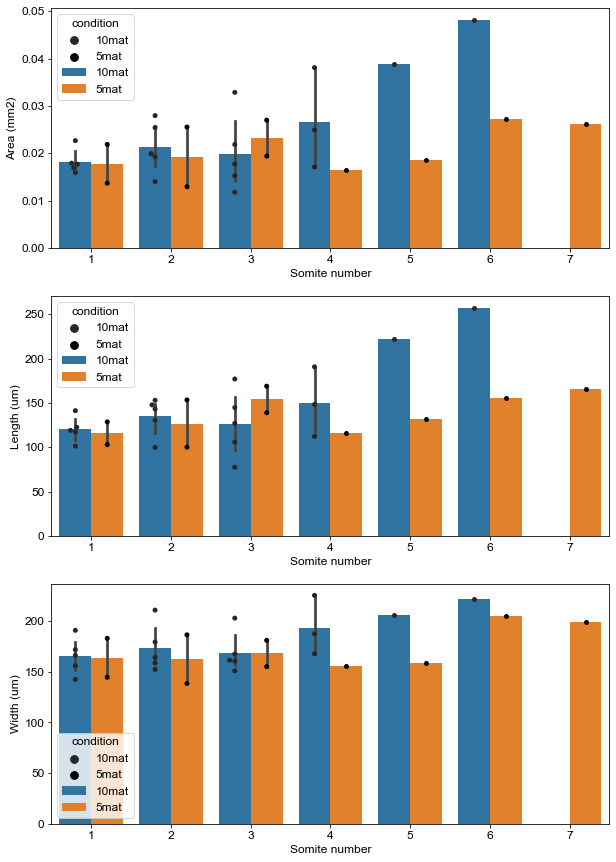

In [72]:
fig, ax = plt.subplots(3,1,figsize=(10,15))
sns.barplot(data=df,x='somite_n',y='area',hue='condition',ax=ax[0])
sns.swarmplot(data=df,x='somite_n',y='area',hue='condition',ax=ax[0], dodge=True, color='k')
sns.barplot(data=df,x='somite_n',y='length',hue='condition',ax=ax[1])
sns.swarmplot(data=df,x='somite_n',y='length',hue='condition',ax=ax[1], dodge=True, color='k')
sns.barplot(data=df,x='somite_n',y='width',hue='condition',ax=ax[2])
sns.swarmplot(data=df,x='somite_n',y='width',hue='condition',ax=ax[2], dodge=True, color='k')

ax[0].set_ylabel('Area (mm2)')
ax[1].set_ylabel('Length (um)')
ax[2].set_ylabel('Width (um)')
ax[0].set_xlabel('Somite number')
ax[1].set_xlabel('Somite number')
ax[2].set_xlabel('Somite number')

fig.savefig('plots.pdf')

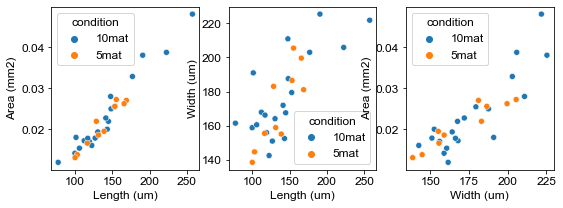

In [76]:
### correlation plots

fig, ax = plt.subplots(1,3,figsize=(9,3))

sns.scatterplot(data=df,x='length',y='area',hue='condition',ax=ax[0])
sns.scatterplot(data=df,x='length',y='width',hue='condition',ax=ax[1])
sns.scatterplot(data=df,x='width',y='area',hue='condition',ax=ax[2])

ax[0].set_xlabel('Length (um)')
ax[0].set_ylabel('Area (mm2)')

ax[1].set_xlabel('Length (um)')
ax[1].set_ylabel('Width (um)')

ax[2].set_xlabel('Width (um)')
ax[2].set_ylabel('Area (mm2)')

fig.savefig('corrs.pdf')

# for i in range(len(conditions)):
#     if conditions[i]=='5mat':
#         color='red'
#     else:
#         color='blue'
#     ax[0].scatter(length[i],areas[i],color=color)
#     ax[1].scatter(width[i],areas[i],color=color)
#     ax[2].scatter(length[i],width[i],color=color)

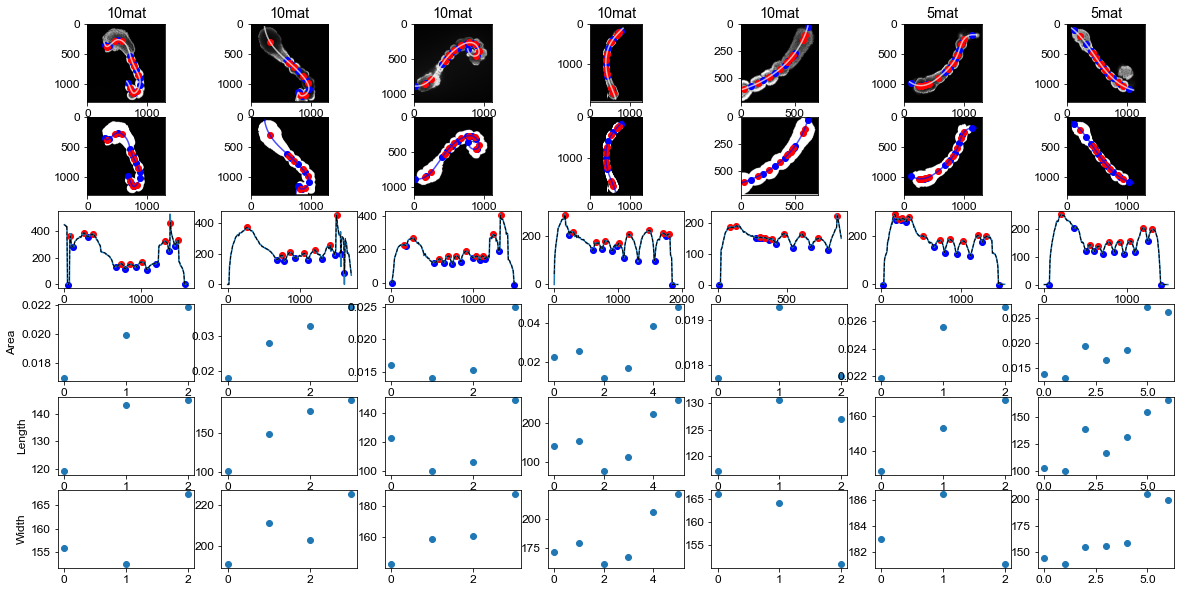

In [61]:
### recap visualize
from skimage.io import imread
from skimage.transform import resize
from scipy import interpolate
from scipy.ndimage import gaussian_filter1d
from scipy.signal import argrelextrema

pxl_size = [1.2403,1.2403,1.0624,1.0624,0.6905,1.2403,1.2403]

fig, ax = plt.subplots(6,len(flist), figsize=(20,10))

for i in range(len(flist)):
    condition = data[i][0]
    img = data[i][1]['img']
    mask = data[i][1]['mask']
    arc_length = data[i][1]['midline']['arc_length']
    profile = data[i][1]['midline']['profile']
    ps = data[i][1]['midline']['ps']
    ### inteprolate on homogeneous x axis
    x = np.linspace(0, np.max(arc_length), 1000)
    f = interpolate.interp1d(arc_length, profile, kind='cubic')
    y = f(x)
    # smoothen slightly the curve
    y = gaussian_filter1d(y, 2)

    ### find minima and maxima
    idxs_min = argrelextrema(y, np.less, order=20)[0]
    idxs_max = argrelextrema(y, np.greater, order=20)[0]

    xmin = x[idxs_min]
    ymin = y[idxs_min]

    xmax = x[idxs_max]
    ymax = y[idxs_max]

    ### find idxs on original profile
    profile_idxs_min = []
    for x1,y1 in zip(xmin,ymin):
        dists = [np.linalg.norm(p-np.array([x1,y1])) for p in np.array([arc_length,profile]).T]
        idx = np.where(dists==np.min(dists))[0][0]
        profile_idxs_min.append(idx)
    profile_idxs_max = []
    for x1,y1 in zip(xmax,ymax):
        dists = [np.linalg.norm(p-np.array([x1,y1])) for p in np.array([arc_length,profile]).T]
        idx = np.where(dists==np.min(dists))[0][0]
        profile_idxs_max.append(idx)

    ax[0,i].imshow(img,cmap='gray')
    ax[0,i].title.set_text(condition)
    ax[0,i].plot(ps[:,1], ps[:,0], '-w', alpha=.7)
    ax[0,i].scatter(ps[profile_idxs_min,1], ps[profile_idxs_min,0], color='blue')
    ax[0,i].scatter(ps[profile_idxs_max,1], ps[profile_idxs_max,0], color='red')
    
    ax[1,i].imshow(mask,cmap='gray')
    ax[1,i].plot(ps[:,1], ps[:,0], '-b', alpha=.7)
    ax[1,i].scatter(ps[profile_idxs_min,1], ps[profile_idxs_min,0], color='blue')
    ax[1,i].scatter(ps[profile_idxs_max,1], ps[profile_idxs_max,0], color='red')
    
    ax[2,i].plot(arc_length,profile)
    ax[2,i].plot(x, y, '--k', lw=1)
    ax[2,i].scatter(xmin, ymin, color='blue')
    ax[2,i].scatter(xmax, ymax, color='red')

    area = data[i][1]['somite_size']['area']
    length = data[i][1]['somite_size']['length']
    width = data[i][1]['somite_size']['width']
    ax[3,i].scatter(1+np.arange(len(area)),area/1000000)
    ax[3,0].set_ylabel('Area')
    ax[4,i].scatter(1+np.arange(len(length)),length)
    ax[4,0].set_ylabel('Length')
    ax[5,i].scatter(1+np.arange(len(width)),width)
    ax[5,0].set_ylabel('Width')

fig.savefig('recap_allSomites.png',dpi=300)